# Crop Calendar Positioning with Hidden Markov Models

By: Darrell Leong

Contact: darrell.leong@yara.com

## Crop Calendar


In [1]:
cropCal = [
    {"stage": "seedling", "weeks": 4},
    {"stage": "tillering", "weeks": 6},
    {"stage": "panicle", "weeks": 3},
    {"stage": "flowering", "weeks": 2},
    {"stage": "filling", "weeks": 3},
    {"stage": "maturity", "weeks": 2}
]
stageList = []
for stgObj in cropCal:
    stageList.append(stgObj["stage"])
    
print(stageList)

['seedling', 'tillering', 'panicle', 'flowering', 'filling', 'maturity']


## Hidden Markov Process

The growth stage of the crop is not directly observable, and is hence the attribute to be predicted. However, the growth stage cannot be directly modelled as hidden states. This is because day-to-day transition probabilities of the stages are not stationary. As time progresses, the probability if transitioning from one growth stage to the next increase. Hence, the progression of growth stages, as a procress, does not exhibit a Markov property.

However, we can model the crop's *relative calendar position* as a discrete Markov process. That is, at any point of time, the crop is in one of the 3 hidden states:
- behind the calendar (-)
- on the calendar (0)
- ahead of the calendar (+)

For example, during the first 6 weeks the paddy crop calendar indicates a growth stage progression of:

seedling, seedling, seedling, seedling, tillering, tillering

However, the crop experiences an accelerated growth stage progression of:

seedling, seedling, tillering, tillering, tillering, tillering

The relative progression of the crop's growth stage against the crop calendar would hence be sequenced as:

0, 0, +2, +2, +2, +2

Assuming the crop does not deviate from the calendar by more than 2 weeks, the 5 discrete hidden states can be defined as $[-2, -1, 0, 1, 2]$.

In [2]:
import numpy as np

# define initial HMM
pi = np.array([0.05, 0.1, 0.7, 0.1, 0.05])
A = np.array([
    [0.8, 0.1, 0.05, 0.03, 0.02],
    [0.1, 0.72, 0.1, 0.05, 0.03],
    [0.05, 0.1, 0.7, 0.1, 0.05],
    [0.03, 0.05, 0.1, 0.72, 0.1],
    [0.02, 0.03, 0.05, 0.1, 0.8]
])
B = np.array([
    [0.8, 0.1, 0.05, 0.03, 0.02],
    [0.1, 0.72, 0.1, 0.05, 0.03],
    [0.05, 0.1, 0.7, 0.1, 0.05],
    [0.03, 0.05, 0.1, 0.72, 0.1],
    [0.02, 0.03, 0.05, 0.1, 0.8]
])

In [3]:
import os, sys

p = os.path.abspath('..')
sys.path.insert(1, p)
from src.HMMDiscrete import HMMDiscrete

# initialize HMM
ins = HMMDiscrete(pi=pi, A=A, B=B)

In [4]:
print("Initial transition probabilities: \n", np.around(ins.A, decimals=2))
x = np.array([2, 2, 3, 3, 3, 2])
costList = ins.update(X=[x])
# print(costList)
print("Updated transition probabilities: \n", np.around(ins.A, decimals=2))

Initial transition probabilities: 
 [[0.8  0.1  0.05 0.03 0.02]
 [0.1  0.72 0.1  0.05 0.03]
 [0.05 0.1  0.7  0.1  0.05]
 [0.03 0.05 0.1  0.72 0.1 ]
 [0.02 0.03 0.05 0.1  0.8 ]]
Updated transition probabilities: 
 [[0.   0.   0.   1.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.12 0.88 0.   0.   0.  ]
 [0.   0.   0.   0.33 0.67]
 [0.02 0.06 0.59 0.   0.33]]


<BarContainer object of 5 artists>

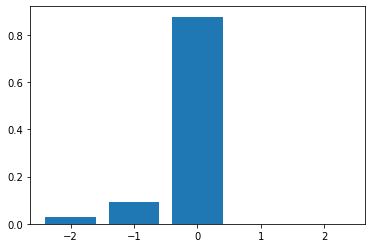

In [5]:
import matplotlib.pyplot as plt
zProb = ins.filter(x=x)
plt.bar((-2, -1, 0, 1, 2), zProb)